# Lecture Sensorik - Signal Waveforms
*HS-Kempten FA204 WS 2018/2019 © R. Aue*

## Excercises Sine Wave

*Sine Wave*:  
$x(t) = x_0 \cdot sin(2 \cdot \pi \cdot f \cdot t + \phi_0) $

**1. sine1.py (t[rad])** 

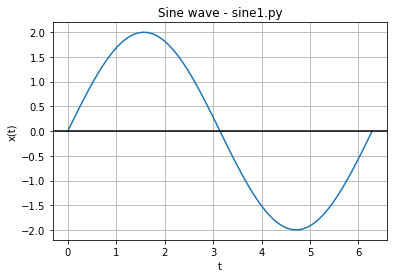

In [8]:
%matplotlib inline
# sine1.py ; t [rad]:
import numpy as np
import matplotlib.pyplot as plt

# consts:
x0 = 2.0   # max. amplitude
te = 2 * np.pi # time end [rad]
tstep = 0.1    # time step size [rad]


# Get t values of the sine wave
t = np.linspace(0, te, int(te/tstep))

 
# Amplitude of the sine wave is sine of a variable like time
x = x0 * np.sin(t)
 

# Plot a sine wave:
plt.plot(t, x)
plt.title('Sine wave - sine1.py')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**Exercise: change signal and plot parameters**

**2. sine2.py (t[s])**

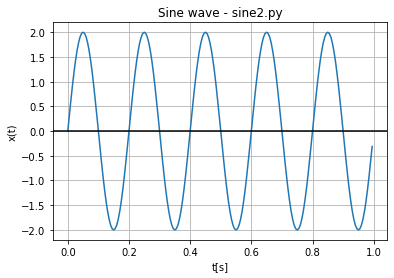

In [9]:
# sine2.py ; t [s]
import numpy as np
import matplotlib.pyplot as plt

# consts:
x0 = 2.0
f = 5.0
te = 1.0 # end of time intervall
nt = 200 # number of time increments


# Get t values of the sine wave
# t = np.linspace(0, te, nt)
t = np.arange(0, te, float(te/nt))

 
# Amplitude of the sine wave is sine of a variable like time
x = x0 * np.sin(2*np.pi*f*t)
 

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(t, x)
plt.title('Sine wave - sine2.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**3. sawtooth.py**

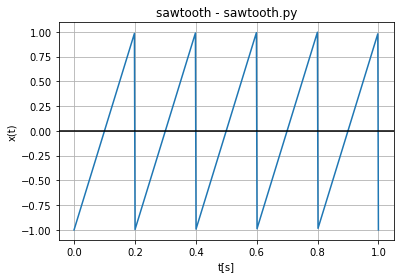

In [10]:
# sawtooth.py:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

# plot signal:
plt.title('sawtooth - sawtooth.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**Exercise: change signal paramters**

**4. square.py:**

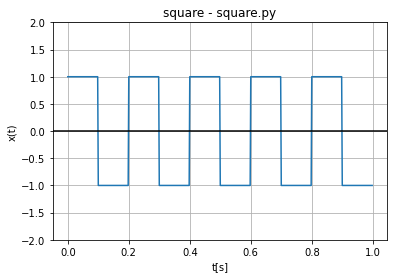

In [11]:
# square.py:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# consts:
tstart = 0   # start time
tend = 1     # end time
npoints = 500 # number of samples

t = np.linspace(tstart, tend, npoints, endpoint=False)

# plot signal:
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)
plt.title('square - square.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**4.1 square2.py (superposition of sine signals):**

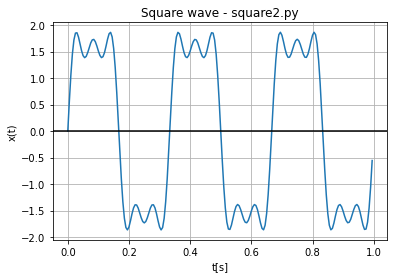

In [12]:
# square2.py ;
import numpy as np
import matplotlib.pyplot as plt

# consts:
x0 = 2.0
f = 3.0
te = 1.0 # end of time intervall
nt = 200 # number of time increments
n = 3    # number of harmonics to be summarized

# Get t values of the sine wave
# t = np.linspace(0, te, nt)
t = np.arange(0, te, float(te/nt))

 
# Amplitude of the sine wave is sine of a variable like time
y=0
i=1
k=1
while i <= n: 
 x = x0/k * np.sin(2*np.pi*f*t*k)
 y += x
 k +=2
 i+=1
 

# Plot twave using time and amplitude
plt.plot(t, y)
plt.title('Square wave - square2.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.rcParams["figure.figsize"] = [20,8]
plt.show()

**Exercise: change number of harmonics in order to get closer to desired square wave;**

**3. noise.py**  
$x(t) = x_0  \cdot sin(2 \cdot \pi \cdot f \cdot t + \phi_0) + x_{noise} $

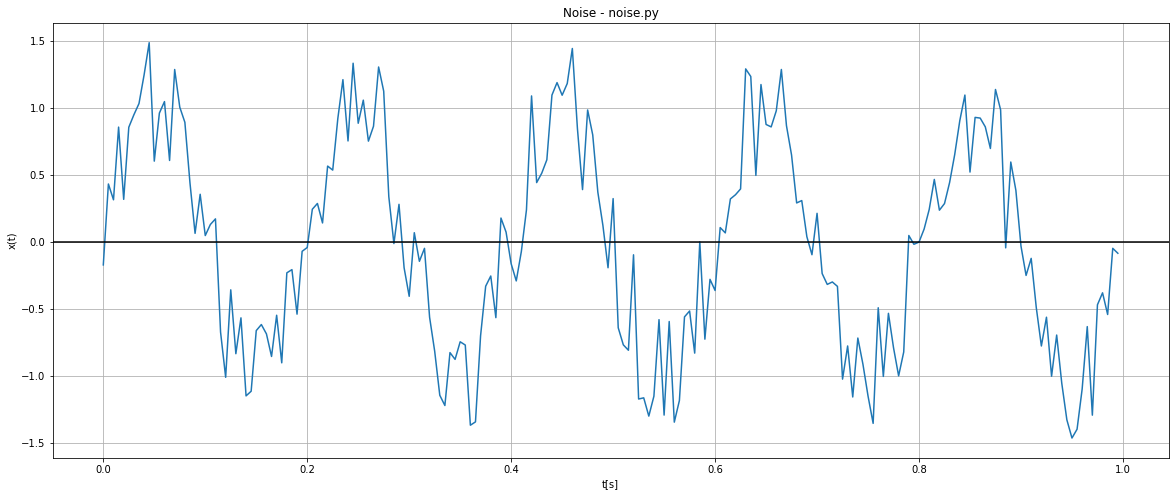

In [13]:
# noise.py
import numpy as np
import matplotlib.pyplot as plt

# consts:
x0 = 1.0  # max. signal amplitude
f = 5.0   # signal frequency
te = 1.0 # end of time intervall
nt = 200 # number of time increments
noisepeak = 0.5 # noise max level  


# Get t values of the sine wave
# t = np.linspace(0, te, nt)
t = np.arange(0, te, float(te/nt))

# creating noise:
noise = np.random.uniform(-noisepeak , noisepeak ,nt)

 
# Amplitude of the sine wave is sine of a variable like time
x = x0 * np.sin(2*np.pi*f*t) + noise


# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(t, x)
plt.title('Noise - noise.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**Exercise: add different levels of noise**

**4. snr.py** *(Signal to Noise Ratio)*  
$SNR = 10 \cdot log (\frac{P_{signal}}{P_{noise}}) = 10 \cdot log (\frac{u^2_{eff,signal}}{u^2_{eff,noise}}) = 20 \cdot log (\frac{u_{eff,signal}}{u_{eff,noise}}) $

snr= 22.09860352890697 dB.


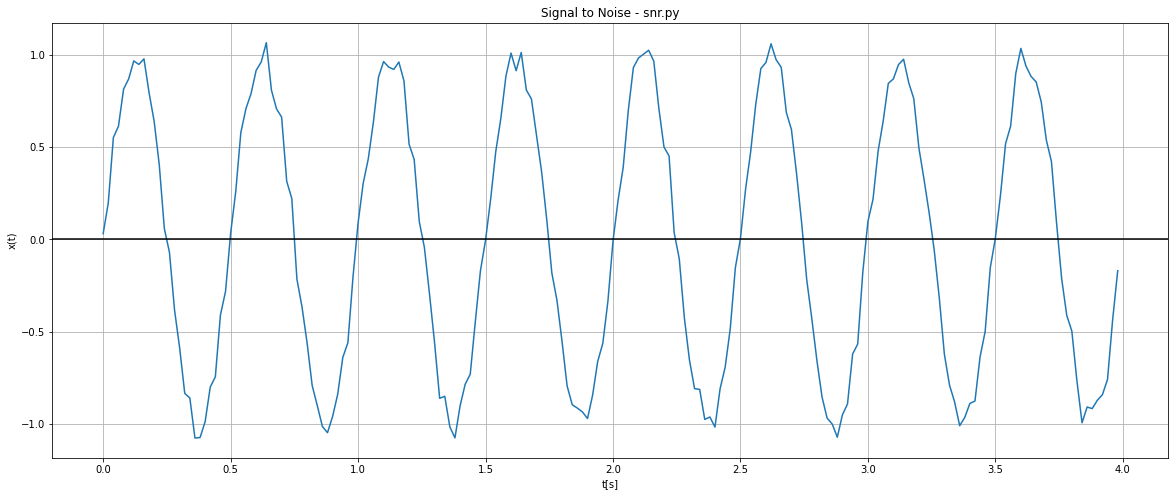

In [14]:
# snr.py:
# %matplotlib inline 
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math as m

# consts:
x0 = 1  # max. signal amplitude
f = 2   # signal frequency
te = 4 # end of time intervall
nt = 200 # number of time increments
noisepeak = 0.1 # noise max level  


# Get t values of the sine wave
# t = np.linspace(0, te, nt)
t = np.arange(0, te, float(te/nt))

# sine wave:
x = x0 * np.sin(2*np.pi*f*t)

# noise:
noise = np.random.uniform(-noisepeak , noisepeak ,nt)

# snr:
s_eff = m.sqrt((integrate.trapz(x**2, t, 0.01))/te)
n_eff = m.sqrt((integrate.trapz(noise**2, t, 0.01))/te)
print('snr= ' + str(20*m.log10(s_eff/n_eff)) + ' dB.')

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(t, x+noise)
plt.title('Signal to Noise - snr.py')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

**Exercise: change signal and noise aplitude; verify rms calculation;**